<a href="https://colab.research.google.com/github/ChetanKnowIt/PML_Notes/blob/main/PML_13_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM WITH TENSORFLOW FOR AUSGAS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
import tensorflow as tf


In [ ]:
aus_path = '/content/drive/MyDrive/Datasets/AusGas.csv'
datasets_ts = pd.read_csv(aus_path)
datasets_ts.head()

,Month,GasProd
0,Jan-1956,1709
1,Feb-1956,1646
2,Mar-1956,1794
3,Apr-1956,1878
4,May-1956,2173


In [ ]:
datasets_ts.shape

(476, 2)

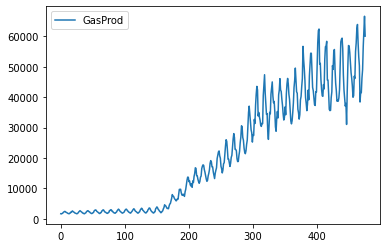

In [ ]:
datasets_ts.plot()
plt.show()

### PART 1: PREPROCESSING

In [ ]:
dataset_train = datasets_ts.iloc[:450, :]
dataset_train.shape

(450, 2)

In [ ]:
#converting pandas type data to numpy type as numpy type required for tensorflow
training_set = dataset_train.iloc[:,1].values
training_set[:5]

array([1709, 1646, 1794, 1878, 2173])

In [ ]:
training_set.shape

(450,)

In [ ]:
training_set[-1]

array([56977])

In [ ]:
training_set = training_set.reshape(-1,1)
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
trn_set_scl = mm.fit_transform(training_set)
print(trn_set_scl[:5])
print(type(trn_set_scl))
print(trn_set_scl.ndim)
print(trn_set_scl.shape)

[[0.00103697]
 [0.        ]
 [0.00243605]
 [0.00381868]
 [0.00867433]]
<class 'numpy.ndarray'>
2
(450, 1)


In [ ]:
timesteps = 10
trn_size = dataset_train.shape[0]
trn_size

450

In [ ]:
X_train = []
y_train = []
for i in range(timesteps, trn_size):
  X_train.append(trn_set_scl[i-timesteps:i, 0])
  y_train.append(trn_set_scl[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train[:10]

array([[0.00103697, 0.        , 0.00243605, 0.00381868, 0.00867433,
        0.01111038, 0.01352997, 0.01267406, 0.00885538, 0.00781842],
       [0.        , 0.00243605, 0.00381868, 0.00867433, 0.01111038,
        0.01352997, 0.01267406, 0.00885538, 0.00781842, 0.0052013 ],
       [0.00243605, 0.00381868, 0.00867433, 0.01111038, 0.01352997,
        0.01267406, 0.00885538, 0.00781842, 0.0052013 , 0.00294631],
       [0.00381868, 0.00867433, 0.01111038, 0.01352997, 0.01267406,
        0.00885538, 0.00781842, 0.0052013 , 0.00294631, 0.00172828],
       [0.00867433, 0.01111038, 0.01352997, 0.01267406, 0.00885538,
        0.00781842, 0.0052013 , 0.00294631, 0.00172828, 0.00069131],
       [0.01111038, 0.01352997, 0.01267406, 0.00885538, 0.00781842,
        0.0052013 , 0.00294631, 0.00172828, 0.00069131, 0.00450999],
       [0.01352997, 0.01267406, 0.00885538, 0.00781842, 0.0052013 ,
        0.00294631, 0.00172828, 0.00069131, 0.00450999, 0.00485565],
       [0.01267406, 0.00885538, 0.0078184

In [ ]:
print(X_train.shape)

(440, 10)


In [ ]:
X_train.shape[0]

440

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(440, 10, 1)

### PART 2: BUILD RNN - LSTM 
[Wiki Page for LSTM](https://en.wikipedia.org/wiki/Long_short-term_memory)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
### INITIALIZE RNN
tf.random.set_seed(seed = 2022)
model = keras.Sequential([
    keras.layers.LSTM(units = 100, return_sequences=True, 
                      input_shape=(X_train.shape[1], X_train.shape[2])),
    keras.layers.LSTM(units = 70, return_sequences=True),
    keras.layers.LSTM(units = 50), 
    keras.layers.Dense(1)                     
])
model.compile(optimizer= 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(X_train, y_train, epochs = 50, batch_size= 25)

Epoch 1/50
18/18 [==============================] - 6s 22ms/step - loss: 0.0495
Epoch 2/50
18/18 [==============================] - 0s 20ms/step - loss: 0.0110
Epoch 3/50
18/18 [==============================] - 0s 20ms/step - loss: 0.0089
Epoch 4/50
18/18 [==============================] - 0s 22ms/step - loss: 0.0074
Epoch 5/50
18/18 [==============================] - 0s 20ms/step - loss: 0.0073
Epoch 6/50
18/18 [==============================] - 0s 21ms/step - loss: 0.0072
Epoch 7/50
18/18 [==============================] - 0s 21ms/step - loss: 0.0073
Epoch 8/50
18/18 [==============================] - 0s 21ms/step - loss: 0.0075
Epoch 9/50
18/18 [==============================] - 0s 21ms/step - loss: 0.0072
Epoch 10/50
18/18 [==============================] - 0s 20ms/step - loss: 0.0077
Epoch 11/50
18/18 [==============================] - 0s 20ms/step - loss: 0.0087
Epoch 12/50
18/18 [==============================] - 0s 22ms/step - loss: 0.0080
Epoch 13/50
18/18 [==================

### Part 3: RESULTS

In [ ]:
dataset_test = datasets_ts.iloc[450:,:]
dataset_test.shape

(26, 2)

In [ ]:
test_set = dataset_test.iloc[:, 1].values
test_set

array([56807, 54634, 51367, 48073, 46251, 43736, 39975, 40478, 46895,
       46147, 55011, 57799, 62450, 63896, 57784, 53231, 50354, 38410,
       41600, 41471, 46287, 49013, 56624, 61739, 66600, 60054])

In [ ]:
dataset_total = pd.concat((dataset_train['GasProd'], dataset_test['GasProd']), axis = 0)
dataset_total

0       1709
1       1646
2       1794
3       1878
4       2173
       ...  
471    49013
472    56624
473    61739
474    66600
475    60054
Name: GasProd, Length: 476, dtype: int64

In [ ]:
dataset_total.shape

(476,)

In [ ]:
# we take 10 extra from train set to get them as part of test set
inputs = dataset_total[len(dataset_total) - len(dataset_test) - timesteps:].values
inputs = inputs.reshape(-1, 1)
len(inputs)
print(inputs.shape)

(36, 1)


In [ ]:
inputs_scl = mm.transform(inputs)
X_test = []
for i in range(timesteps, len(inputs_scl)):
  X_test.append(inputs_scl[i-timesteps:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
X_test.shape

(26, 10, 1)

In [ ]:
len(X_test)

26

In [ ]:
predicted_values = model.predict(X_test)
predicted_values

1/1 [==============================] - 1s 1s/step


array([[0.9448642 ],
       [0.9393854 ],
       [0.84788895],
       [0.7300566 ],
       [0.6365161 ],
       [0.59788865],
       [0.5923539 ],
       [0.62368196],
       [0.65269816],
       [0.7293409 ],
       [0.78864384],
       [0.87034726],
       [0.91909623],
       [0.9322104 ],
       [0.9092065 ],
       [0.82623047],
       [0.734792  ],
       [0.6868149 ],
       [0.61729074],
       [0.59133595],
       [0.6262625 ],
       [0.7192022 ],
       [0.8436632 ],
       [0.96191865],
       [1.0090406 ],
       [1.0018649 ]], dtype=float32)

In [ ]:
predicted_values.shape

(26, 1)

In [ ]:
predicted_values = mm.inverse_transform( predicted_values)


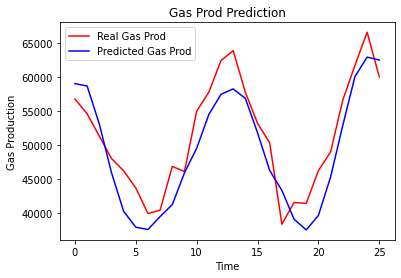

In [ ]:
plt.plot(test_set, color = 'red', label = 'Real Gas Prod')
plt.plot(predicted_values, color = 'blue', label = 'Predicted Gas Prod')
plt.title('Gas Prod Prediction')
plt.xlabel('Time')
plt.ylabel('Gas Production')
plt.legend()
plt.show()

In [ ]:
np.sqrt(mean_squared_error(predicted_values, test_set))

3873.1714158644168

# LSTM with FRED-NROUST.csv

In [ ]:
aus_path = '/content/drive/MyDrive/Datasets/FRED-NROUST.csv'
datasets_ts = pd.read_csv(aus_path)
datasets_ts.head()

,Date,Value
0,01-01-1949,5.255053
1,01-04-1949,5.261516
2,01-07-1949,5.268013
3,01-10-1949,5.274564
4,01-01-1950,5.281182


In [ ]:
datasets_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    296 non-null    object 
 1   Value   296 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.8+ KB


In [ ]:
### PREPROCESSING
datasets_ts.shape

(296, 2)

In [ ]:
dataset_train = datasets_ts.iloc[:288, :]
dataset_train.shape

(288, 2)

In [ ]:
#converting pandas type data to numpy type as numpy type required for tensorflow
training_set = dataset_train.iloc[:,1].values
training_set[:5]

array([5.25505257, 5.26151562, 5.268013  , 5.274564  , 5.281182  ])

In [ ]:
training_set.shape

(288,)

In [ ]:
training_set[-1]

4.480756

In [ ]:
training_set = training_set.reshape(-1,1)
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
trn_set_scl = mm.fit_transform(training_set)
print(trn_set_scl[:5])
print(type(trn_set_scl))
print(trn_set_scl.ndim)
print(trn_set_scl.shape)

[[0.44014855]
 [0.44382247]
 [0.4475159 ]
 [0.45123982]
 [0.45500182]]
<class 'numpy.ndarray'>
2
(288, 1)


In [ ]:
X_train = []
y_train = []
timesteps = 5
trn_size = dataset_train.shape[0]
for i in range(timesteps, trn_size):
  X_train.append(trn_set_scl[i-timesteps:i, 0])
  y_train.append(trn_set_scl[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(283, 5, 1)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
### INITIALIZE RNN
tf.random.set_seed(seed = 2022)
model = keras.Sequential([
    keras.layers.LSTM(units = 100, return_sequences=True, 
                      input_shape=(X_train.shape[1], X_train.shape[2])),
    keras.layers.LSTM(units = 70, return_sequences=True),
    keras.layers.LSTM(units = 50), 
    keras.layers.Dense(1)                     
])
model.compile(optimizer= 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(X_train, y_train, epochs = 50, batch_size= 25)

Epoch 1/50
12/12 [==============================] - 6s 14ms/step - loss: 0.2336
Epoch 2/50
12/12 [==============================] - 0s 13ms/step - loss: 0.0328
Epoch 3/50
12/12 [==============================] - 0s 15ms/step - loss: 0.0233
Epoch 4/50
12/12 [==============================] - 0s 14ms/step - loss: 0.0128
Epoch 5/50
12/12 [==============================] - 0s 14ms/step - loss: 0.0089
Epoch 6/50
12/12 [==============================] - 0s 15ms/step - loss: 0.0057
Epoch 7/50
12/12 [==============================] - 0s 13ms/step - loss: 0.0042
Epoch 8/50
12/12 [==============================] - 0s 13ms/step - loss: 0.0036
Epoch 9/50
12/12 [==============================] - 0s 14ms/step - loss: 0.0039
Epoch 10/50
12/12 [==============================] - 0s 13ms/step - loss: 0.0036
Epoch 11/50
12/12 [==============================] - 0s 14ms/step - loss: 0.0035
Epoch 12/50
12/12 [==============================] - 0s 14ms/step - loss: 0.0035
Epoch 13/50
12/12 [==================

In [ ]:
dataset_test = datasets_ts.iloc[288:,:]
dataset_test.shape

(8, 2)

In [ ]:
test_set = dataset_test.iloc[:, 1].values
test_set.shape

(8,)

In [ ]:
dataset_total = pd.concat((dataset_train['Value'], dataset_test['Value']), axis = 0)
dataset_total

0      5.255053
1      5.261516
2      5.268013
3      5.274564
4      5.281182
         ...   
291    4.450651
292    4.445137
293    4.440214
294    4.435784
295    4.431760
Name: Value, Length: 296, dtype: float64

In [ ]:
dataset_total.shape

(296,)

In [ ]:
# we take 10 extra from train set to get them as part of test set
inputs = dataset_total[len(dataset_total) - len(dataset_test) - timesteps:].values
inputs = inputs.reshape(-1, 1)
len(inputs)
print(inputs.shape)

(13, 1)


In [ ]:
inputs_scl = mm.transform(inputs)
X_test = []
for i in range(timesteps, len(inputs_scl)):
  X_test.append(inputs_scl[i-timesteps:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
X_test.shape

(8, 5, 1)

In [ ]:
len(X_test)

8

In [ ]:
predicted_values = model.predict(X_test)
predicted_values

1/1 [==============================] - 1s 1s/step


array([[ 0.00885722],
       [ 0.00287885],
       [-0.00272651],
       [-0.00786749],
       [-0.01250179],
       [-0.01663146],
       [-0.02029072],
       [-0.0235314 ]], dtype=float32)

In [ ]:
predicted_values.shape

(8, 1)

In [ ]:
predicted_values = mm.inverse_transform( predicted_values)
predicted_values

array([[12.390582],
       [12.372082],
       [12.354734],
       [12.338824],
       [12.324484],
       [12.311703],
       [12.300379],
       [12.29035 ]], dtype=float32)

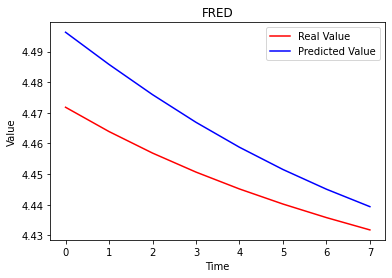

In [ ]:
plt.plot(test_set, color = 'red', label = 'Real Value')
plt.plot(predicted_values, color = 'blue', label = 'Predicted Value')
plt.title('FRED')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
np.sqrt(mean_squared_error(predicted_values, test_set))

0.01645952443885413

# LSTM WITH BUNDESBANK-BBK01_WT5511.csv

In [ ]:
BP = '/content/drive/MyDrive/Datasets/BUNDESBANK-BBK01_WT5511.csv'
datasets_ts = pd.read_csv(BP)
datasets_ts.shape

(577, 2)

In [ ]:
datasets_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    577 non-null    object 
 1   Value   577 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.1+ KB


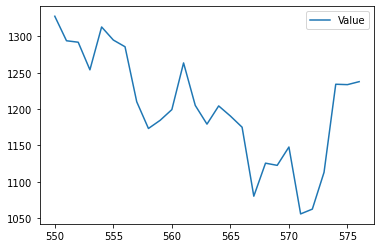

In [ ]:
datasets_ts[550:].plot()
plt.show()

In [ ]:
### PREPROCESSING
datasets_ts.shape

(577, 2)

In [ ]:
dataset_train = datasets_ts.iloc[:567, :]
dataset_train.shape

(567, 2)

In [ ]:
#converting pandas type data to numpy type as numpy type required for tensorflow
training_set = dataset_train.iloc[:,1].values
training_set[:5]

array([39.1 , 42.  , 40.95, 38.9 , 39.85])

In [ ]:
training_set.shape

(567,)

In [ ]:
training_set[-1]

1175.0

In [ ]:
training_set = training_set.reshape(-1,1)
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
trn_set_scl = mm.fit_transform(training_set)
print(trn_set_scl[:5])
print(type(trn_set_scl))
print(trn_set_scl.ndim)
print(trn_set_scl.shape)

[[0.00230037]
 [0.00391955]
 [0.0033333 ]
 [0.0021887 ]
 [0.00271912]]
<class 'numpy.ndarray'>
2
(567, 1)


In [ ]:
X_train = []
y_train = []
timesteps = 3
trn_size = dataset_train.shape[0]
for i in range(timesteps, trn_size):
  X_train.append(trn_set_scl[i-timesteps:i, 0])
  y_train.append(trn_set_scl[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(564, 3, 1)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
### INITIALIZE RNN
tf.random.set_seed(seed = 2022)
model = keras.Sequential([
    keras.layers.LSTM(units = 100, return_sequences=True, 
                      input_shape=(X_train.shape[1], X_train.shape[2])),
    keras.layers.LSTM(units = 70, return_sequences=True),
    keras.layers.LSTM(units = 50), 
    keras.layers.Dense(1)                     
])
model.compile(optimizer= 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(X_train, y_train, epochs = 50, batch_size= 25)

Epoch 1/50
23/23 [==============================] - 6s 10ms/step - loss: 0.0541
Epoch 2/50
23/23 [==============================] - 0s 11ms/step - loss: 0.0103
Epoch 3/50
23/23 [==============================] - 0s 10ms/step - loss: 0.0020
Epoch 4/50
23/23 [==============================] - 0s 10ms/step - loss: 0.0012
Epoch 5/50
23/23 [==============================] - 0s 11ms/step - loss: 0.0010
Epoch 6/50
23/23 [==============================] - 0s 10ms/step - loss: 0.0010
Epoch 7/50
23/23 [==============================] - 0s 10ms/step - loss: 8.7942e-04
Epoch 8/50
23/23 [==============================] - 0s 10ms/step - loss: 8.8551e-04
Epoch 9/50
23/23 [==============================] - 0s 10ms/step - loss: 8.1862e-04
Epoch 10/50
23/23 [==============================] - 0s 10ms/step - loss: 8.7045e-04
Epoch 11/50
23/23 [==============================] - 0s 11ms/step - loss: 7.5975e-04
Epoch 12/50
23/23 [==============================] - 0s 10ms/step - loss: 7.5902e-04
Epoch 13/50
2

In [ ]:
dataset_test = datasets_ts.iloc[567:,:]
dataset_test.shape

(10, 2)

In [ ]:
test_set = dataset_test.iloc[:, 1].values
test_set.shape

(10,)

In [ ]:
dataset_total = pd.concat((dataset_train['Value'], dataset_test['Value']), axis = 0)
dataset_total

0        39.10
1        42.00
2        40.95
3        38.90
4        39.85
        ...   
572    1062.25
573    1112.90
574    1234.15
575    1233.60
576    1237.70
Name: Value, Length: 577, dtype: float64

In [ ]:
dataset_total.shape

(577,)

In [ ]:
# we take 10 extra from train set to get them as part of test set
inputs = dataset_total[len(dataset_total) - len(dataset_test) - timesteps:].values
inputs = inputs.reshape(-1, 1)
len(inputs)
print(inputs.shape)

(13, 1)


In [ ]:
inputs_scl = mm.transform(inputs)
X_test = []
for i in range(timesteps, len(inputs_scl)):
  X_test.append(inputs_scl[i-timesteps:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
X_test.shape

(10, 3, 1)

In [ ]:
len(X_test)

10

In [ ]:
predicted_values = model.predict(X_test)
predicted_values

1/1 [==============================] - 1s 1s/step


array([[0.63930076],
       [0.6260639 ],
       [0.6085445 ],
       [0.5887968 ],
       [0.60318446],
       [0.6001811 ],
       [0.59202194],
       [0.5700504 ],
       [0.5893592 ],
       [0.62479705]], dtype=float32)

In [ ]:
predicted_values.shape

(10, 1)

In [ ]:
predicted_values = mm.inverse_transform( predicted_values)
predicted_values

array([[1179.9805],
       [1156.273 ],
       [1124.8954],
       [1089.5269],
       [1115.2954],
       [1109.9164],
       [1095.3031],
       [1055.9517],
       [1090.5342],
       [1154.004 ]], dtype=float32)

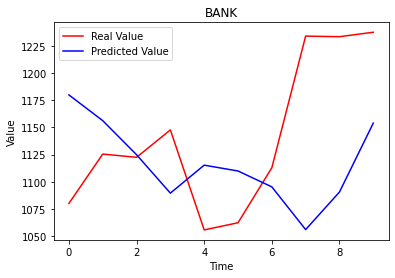

In [ ]:
plt.plot(test_set, color = 'red', label = 'Real Value')
plt.plot(predicted_values, color = 'blue', label = 'Predicted Value')
plt.title('BANK')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
np.sqrt(mean_squared_error(predicted_values, test_set))

89.2723631026785

### Results with bank
1. for timestep 10, rmse = 108.7273697100209
2. for timestep 5, rmse = 108.7273697100209
3. for timestep 3, rmse = 89.2723631026785
